In [1]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util
import time
start = time.time()
plt.rcParams["figure.figsize"] = [15,5]

from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification

In [2]:
data_path = "data/merged_data_Peter/"

In [3]:
accraw = pd.read_csv(data_path + "Accelerometer.csv")
timecol = "Time (s)"
accfeatures = list()
for col in accraw:
    if (col != timecol) and \
    (col != "Absolute acceleration (m/s^2)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        accfeatures.append(col)
accfeatures

['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

In [4]:
gyraw = pd.read_csv(data_path + "Gyroscope.csv")
gyfeatures = list()
for col in gyraw:
    if (col != timecol) and \
    (col != "Absolute (rad/s)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        gyfeatures.append(col)
gyfeatures

['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


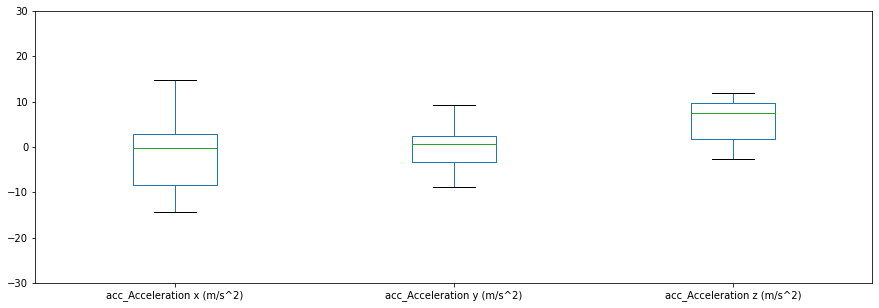

Figure saved to figures/figure_2.png


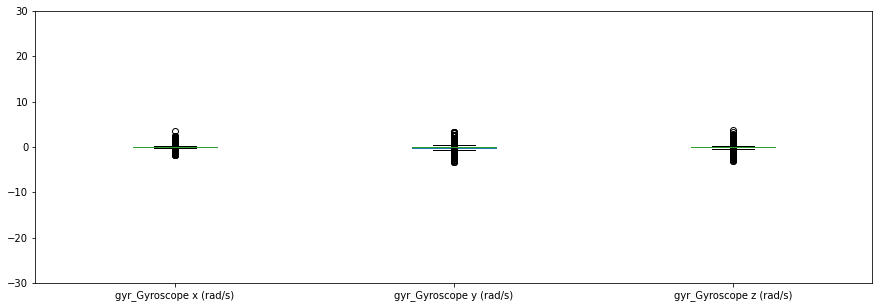

Figure saved to figures/figure_3.png


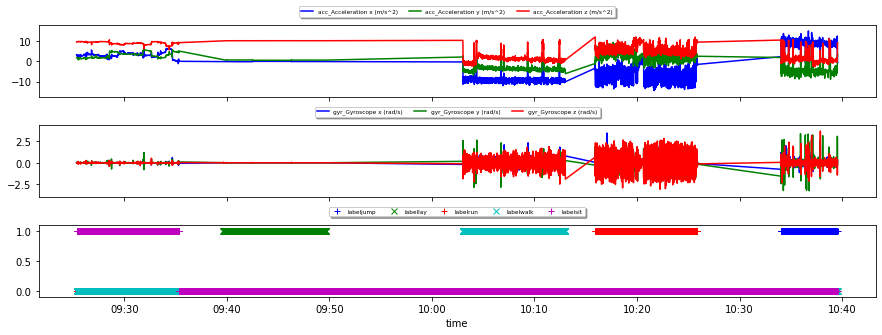

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  labeljump  labellay  labelrun  labelwalk  labelsit
count                 5464.000                 5464.000                 5464.000   8905.000  8905.000  8905.000   8905.000  8905.000
mean                    -0.014                   -0.121                   -0.011      0.075     0.135     0.134      0.135     0.135
std                      0.406                    0.417                    0.730      0.263     0.342     0.341      0.342     0.342
min                     -1.771                   -3.273                   -3.107      0.000     0.000     0.000      0.000     0.000
25%                     -0.069                   -0.223                   -0.107      0.000     0.000     0.000      0.000     0.000
50%                     -0.001                   -0.001                   -0.000      0.000     0.000     0.000      0.000     0.000
75%                      0.062                    0.007              

In [5]:
Dataset = CreateDataset(data_path , 500)

Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
Dataviz = VisualizeDataset()

Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])

Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "label"], \
                        ["like", "like", "like"], \
                        ["line", "line", "points"])

util.print_statistics(dataset)

In [23]:
util.print_statistics(dataset, describe=False)


column 		 % missing 		 mean 		 standard deviation 		 min 		 max
acc_Acceleration x (m/s^2)		38.6%		-1.859		 6.346		-14.376		14.872
acc_Acceleration y (m/s^2)		38.6%		 0.097		 3.319		-8.805		 9.282
acc_Acceleration z (m/s^2)		38.6%		 5.978		 3.960		-2.681		11.946
gyr_Gyroscope x (rad/s)		38.6%		-0.014		 0.406		-1.771		 3.486
gyr_Gyroscope y (rad/s)		38.6%		-0.121		 0.417		-3.273		 3.399
gyr_Gyroscope z (rad/s)		38.6%		-0.011		 0.730		-3.107		 3.708
labeljump		0.0%		 0.075		 0.263		 0.000		 1.000
labellay		0.0%		 0.135		 0.342		 0.000		 1.000
labelrun		0.0%		 0.134		 0.341		 0.000		 1.000
labelwalk		0.0%		 0.135		 0.342		 0.000		 1.000
labelsit		0.0%		 0.135		 0.342		 0.000		 1.000


TypeError: Could not convert labelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitlabelsitundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedlabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellaylabellayundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedlabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalklabelwalkundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunlabelrunundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedundefinedlabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljumplabeljump to numeric

In [6]:
dataset

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),labeljump,labellay,labelrun,labelwalk,labelsit
2021-06-18 09:25:21.098761984,3.210635,1.693915,9.448468,-0.020228,0.019859,-0.015665,0,0,0,0,1
2021-06-18 09:25:21.598761984,2.746455,1.639053,9.598162,-0.005243,0.082636,-0.019776,0,0,0,0,1
2021-06-18 09:25:22.098761984,2.623294,1.648029,9.634036,0.001549,-0.006061,0.004314,0,0,0,0,1
2021-06-18 09:25:22.598761984,2.672195,1.646336,9.615755,-0.002601,-0.003829,0.008318,0,0,0,0,1
2021-06-18 09:25:23.098761984,2.685996,1.641959,9.622393,-0.002585,-0.001652,0.004259,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18 10:39:31.098761984,9.878311,-4.721824,0.881016,-0.538983,0.027016,-0.147914,1,0,0,0,0
2021-06-18 10:39:31.598761984,12.399385,-4.803043,0.543853,-0.358027,0.228853,-0.114507,1,0,0,0,0
2021-06-18 10:39:32.098761984,5.196722,0.854045,5.654859,0.050223,3.097626,-1.439491,1,0,0,0,0
2021-06-18 10:39:32.598761984,-0.896933,3.359202,9.038163,0.032046,-0.125400,-0.571747,1,0,0,0,0


In [7]:
N_FORWARD_SELECTION = 50

In [8]:
DataViz = VisualizeDataset()
prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)

print('Training set length is: ', len(train_X.index))
print('Test set length is: ', len(test_X.index))

Training set length is:  3824
Test set length is:  1640


In [9]:
basic_features = ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)', 'gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)']

In [10]:
fs = FeatureSelectionClassification()
features, ordered_features, ordered_scores = fs.forward_selection(N_FORWARD_SELECTION, 
                                                                  train_X[basic_features], 
                                                                  test_X[basic_features],
                                                                  train_y,
                                                                  test_y,
                                                                  gridsearch=False)

Added feature0
Added feature1
Added feature2
Added feature3
Added feature4
Added feature5
Added feature6
Added feature7
Added feature8
Added feature9
Added feature10
Added feature11
Added feature12
Added feature13
Added feature14
Added feature15
Added feature16
Added feature17
Added feature18
Added feature19
Added feature20
Added feature21
Added feature22
Added feature23
Added feature24
Added feature25
Added feature26
Added feature27
Added feature28
Added feature29
Added feature30
Added feature31
Added feature32
Added feature33
Added feature34
Added feature35
Added feature36
Added feature37
Added feature38
Added feature39
Added feature40
Added feature41
Added feature42
Added feature43
Added feature44
Added feature45
Added feature46
Added feature47
Added feature48
Added feature49


Figure saved to figures/figure_1.png


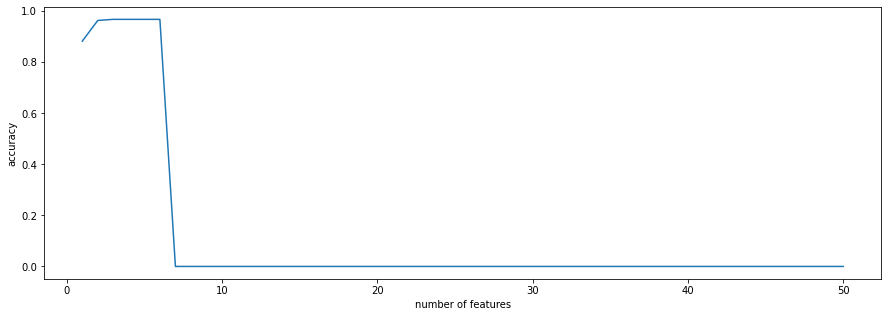

In [11]:
DataViz.plot_xy(x=[range(1, N_FORWARD_SELECTION+1)], y=[ordered_scores],
                xlabel='number of features', ylabel='accuracy')

In [12]:
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()
start = time.time()


reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
performance_training = []
performance_test = []
## Due to runtime constraints we run the experiment 3 times, yet if you want even more robust data one should increase the repetitions. 
N_REPEATS_NN = 3

In [13]:
for reg_param in reg_parameters:
    performance_tr = 0
    performance_te = 0
    for i in range(0, N_REPEATS_NN):

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(
            train_X, train_y,
            test_X, hidden_layer_sizes=(250, ), alpha=reg_param, max_iter=500,
            gridsearch=False
        )

        performance_tr += eval.accuracy(train_y, class_train_y)
        performance_te += eval.accuracy(test_y, class_test_y)
    performance_training.append(performance_tr/N_REPEATS_NN)
    performance_test.append(performance_te/N_REPEATS_NN)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.

Figure saved to figures/figure_2.png


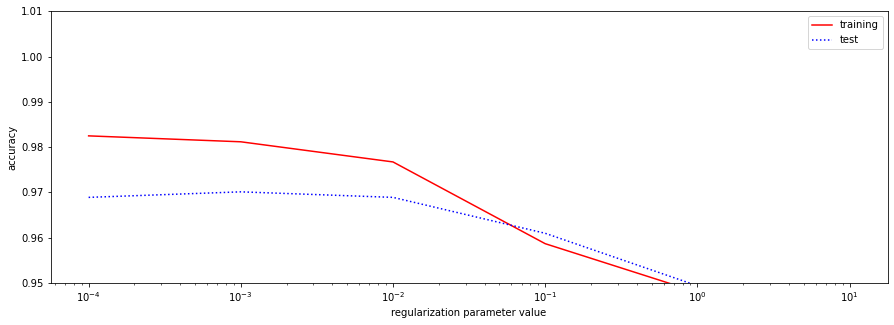

In [14]:
DataViz.plot_xy(x=[reg_parameters, reg_parameters], y=[performance_training, performance_test], method='semilogx',
                xlabel='regularization parameter value', ylabel='accuracy', ylim=[0.95, 1.01],
                names=['training', 'test'], line_styles=['r-', 'b:'])

In [15]:
N_KCV_REPEATS = 5

print('Preprocessing took', time.time()-start, 'seconds.')

scores_over_all_algs = []

Preprocessing took 202.12292790412903 seconds.


In [16]:
selected_train_X = train_X[basic_features]
selected_test_X = test_X[basic_features]

# First we run our non deterministic classifiers a number of times to average their score.

performance_tr_nn = 0
performance_tr_rf = 0
performance_tr_svm = 0
performance_te_nn = 0
performance_te_rf = 0
performance_te_svm = 0

for repeat in range(0, N_KCV_REPEATS):
    print("Training NeuralNetwork run {} / {} ... ".format(repeat, N_KCV_REPEATS))
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )
    print("Training RandomForest run {} / {} ... ".format(repeat, N_KCV_REPEATS))
    performance_tr_nn += eval.accuracy(train_y, class_train_y)
    performance_te_nn += eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )

    performance_tr_rf += eval.accuracy(train_y, class_train_y)
    performance_te_rf += eval.accuracy(test_y, class_test_y)

    print("Training SVM run {} / {}".format(repeat, N_KCV_REPEATS))

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )
    performance_tr_svm += eval.accuracy(train_y, class_train_y)
    performance_te_svm += eval.accuracy(test_y, class_test_y)


overall_performance_tr_nn = performance_tr_nn/N_KCV_REPEATS
overall_performance_te_nn = performance_te_nn/N_KCV_REPEATS
overall_performance_tr_rf = performance_tr_rf/N_KCV_REPEATS
overall_performance_te_rf = performance_te_rf/N_KCV_REPEATS
overall_performance_tr_svm = performance_tr_svm/N_KCV_REPEATS
overall_performance_te_svm = performance_te_svm/N_KCV_REPEATS

#     #And we run our deterministic classifiers:
print("Determenistic Classifiers:")

print("Training Nearest Neighbor run 1 / 1")
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(
    selected_train_X, train_y, selected_test_X, gridsearch=True
)
performance_tr_knn = eval.accuracy(train_y, class_train_y)
performance_te_knn = eval.accuracy(test_y, class_test_y)
print("Training Descision Tree run 1 / 1")
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(
    selected_train_X, train_y, selected_test_X, gridsearch=True
)

performance_tr_dt = eval.accuracy(train_y, class_train_y)
performance_te_dt = eval.accuracy(test_y, class_test_y)
print("Training Naive Bayes run 1/1")
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(
    selected_train_X, train_y, selected_test_X
)

performance_tr_nb = eval.accuracy(train_y, class_train_y)
performance_te_nb = eval.accuracy(test_y, class_test_y)

scores_with_sd = util.print_table_row_performances(len(selected_train_X.index), len(selected_test_X.index), [
                                                                                            (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                            (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                            (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_dt, performance_te_dt),
                                                                                            (performance_tr_nb, performance_te_nb)])
scores_over_all_algs.append(scores_with_sd)


Training NeuralNetwork run 0 / 5 ... 
Training RandomForest run 0 / 5 ... 
Training SVM run 0 / 5
Training NeuralNetwork run 1 / 5 ... 
Training RandomForest run 1 / 5 ... 
Training SVM run 1 / 5
Training NeuralNetwork run 2 / 5 ... 
Training RandomForest run 2 / 5 ... 
Training SVM run 2 / 5
Training NeuralNetwork run 3 / 5 ... 
Training RandomForest run 3 / 5 ... 
Training SVM run 3 / 5
Training NeuralNetwork run 4 / 5 ... 
Training RandomForest run 4 / 5 ... 
Training SVM run 4 / 5
Determenistic Classifiers:
Training Nearest Neighbor run 1 / 1
Training Descision Tree run 1 / 1
Training Naive Bayes run 1/1


TypeError: print_table_row_performances() missing 1 required positional argument: 'values'

In [17]:
scores_with_sd = util.print_table_row_performances("Normal", len(selected_train_X.index), len(selected_test_X.index), [
                                                                                            (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                            (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                            (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_dt, performance_te_dt),
                                                                                            (performance_tr_nb, performance_te_nb)])
scores_over_all_algs.append(scores_with_sd)

Normal & 0.9832\emph{( 0.9791 - 0.9874 )}  & 0.9707\emph{( 0.9624 - 0.9791 )} & 0.9966\emph{( 0.9947 - 0.9985 )}  & 0.9741\emph{( 0.9663 - 0.9820 )} & 0.9660\emph{( 0.9601 - 0.9719 )}  & 0.9677\emph{( 0.9589 - 0.9764 )} & 1.0000\emph{( 1.0000 - 1.0000 )}  & 0.9720\emph{( 0.9638 - 0.9801 )} & 1.0000\emph{( 1.0000 - 1.0000 )}  & 0.9720\emph{( 0.9638 - 0.9801 )} & 0.9916\emph{( 0.9887 - 0.9946 )}  & 0.9707\emph{( 0.9624 - 0.9791 )} & 0.9589\emph{( 0.9525 - 0.9654 )}  & 0.9591\emph{( 0.9494 - 0.9689 )}\\\hline


IndexError: list index out of range

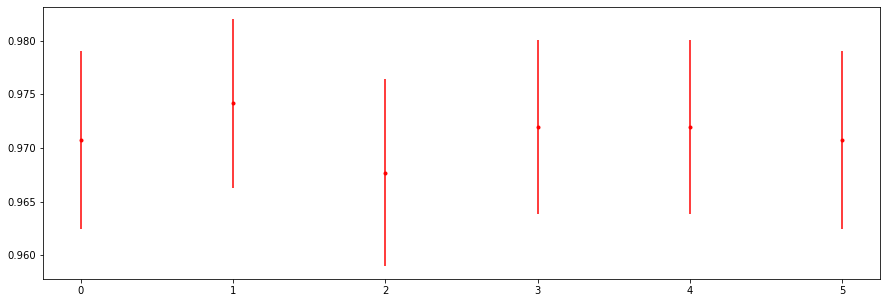

In [18]:
DataViz.plot_performances_classification(['NN', 'RF','SVM', 'KNN', 'DT', 'NB'], "Normal", scores_over_all_algs)

Figure saved to figures/figure_3.png


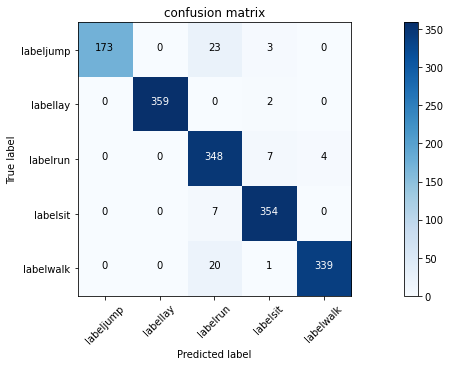

In [19]:
test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)

DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)